# Demo of khipu algorithms

- Goal: quick illustration of the khipu algorithm
- Citation: Li, S. and Zheng, S., 2023. Generalized tree structure to annotate untargeted metabolomics and stable isotope tracing data. Analytical chemistry, 95(15), pp.6212-6217. (https://pubs.acs.org/doi/10.1021/acs.analchem.2c05810)
- Original repo: https://github.com/shuzhao-li-lab/khipu


In [7]:
!pip install --upgrade khipu-metabolomics

  Found existing installation: khipu-metabolomics 0.4.12
    Uninstalling khipu-metabolomics-0.4.12:
      Successfully uninstalled khipu-metabolomics-0.4.12


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from khipu.extended import *

In [9]:
for x in (adduct_search_patterns, isotope_search_patterns, extended_adducts):
    print(x, '\n')

[(21.982, 'Na/H'), (41.026549, 'ACN'), (35.9767, 'HCl'), (37.955882, 'K/H')] 

[(1.003355, '13C/12C', (0, 0.8)), (2.00671, '13C/12C*2', (0, 0.8)), (3.010065, '13C/12C*3', (0, 0.8)), (4.01342, '13C/12C*4', (0, 0.8)), (5.016775, '13C/12C*5', (0, 0.8)), (6.02013, '13C/12C*6', (0, 0.8)), (7.023485, '13C/12C*7', (0, 0.8)), (8.02684, '13C/12C*8', (0, 0.8)), (9.030195, '13C/12C*9', (0, 0.8)), (10.03355, '13C/12C*10', (0, 0.8)), (11.036905, '13C/12C*11', (0, 0.8)), (12.04026, '13C/12C*12', (0, 0.8))] 

[(1.0078, 'H'), (10.991, 'Na/H, double charged'), (0.5017, '13C/12C, double charged'), (17.02655, 'NH3'), (18.0106, 'H2O'), (18.033823, 'M+NH4'), (27.01089904, 'HCN'), (37.94694, 'Ca/H2'), (32.026215, 'MeOH'), (43.96389, 'Na2/H2'), (67.987424, 'NaCOOH'), (83.961361, 'KCOOH'), (97.96737927, 'H2SO4'), (97.97689507, 'H3PO4')] 



In [10]:
# Read 12C data via khipu
subnetworks, peak_dict, edge_dict = local_read_file(
    "ecoli_pos.tsv", 
    start_col=3,
    end_col=9,
    isotope_search_patterns=isotope_search_patterns, 
    adduct_search_patterns=adduct_search_patterns,
    mz_tolerance_ppm=5,
    rt_tolerance=1,
)

Working on file  ecoli_pos.tsv
table header looks like:  ['id_number', 'mz', 'rtime', '12C_Ecoli_20220321_004', '12C_Ecoli_20220321_004_20220322095030', '12C_Ecoli_20220321_004_20220322130235', '13C_Ecoli_20220321_004', '13C_Ecoli_20220321_004_20220322132355', '13C_Ecoli_20220321_004_20220322101150']
Read 3602 feature lines


In [11]:
sizes = [n.number_of_nodes() for n in subnetworks]
list_sizes = [
    (ii, sizes[ii]) for ii in range(len(sizes)) if sizes[ii] > 8
]
print(list_sizes)

[(3, 9), (27, 30), (50, 14), (81, 10), (82, 9), (118, 13), (171, 9), (183, 9), (228, 11)]


In [22]:
for G in subnetworks:
    if "F2353" in G.nodes():
        print(G.nodes())
        #print(G.edges(data=True))

['F1507', 'F1685', 'F1741', 'F1461', 'F1434', 'F1454', 'F1331', 'F2353', 'F3209', 'F1550', 'F1397', 'F3269', 'F1883']


In [20]:
subnetworks[118].nodes()

NodeView(('F1507', 'F1685', 'F1741', 'F1461', 'F1434', 'F1454', 'F1331', 'F2353', 'F3209', 'F1550', 'F1397', 'F3269', 'F1883'))

In [23]:
list(subnetworks[118].edges(data=True))[1]

('F1507', 'F1397', {'type': 'isotope', 'tag': '13C/12C*3'})

In [24]:
edges = []
for e in subnetworks[118].edges(data=True):
    edges.append((e[0], e[1], e[2]['type']))
    
print(edges)

[('F1507', 'F1331', 'isotope'), ('F1507', 'F1397', 'isotope'), ('F1507', 'F1434', 'isotope'), ('F1507', 'F1461', 'isotope'), ('F1507', 'F1550', 'isotope'), ('F1507', 'F1685', 'isotope'), ('F1507', 'F1741', 'isotope'), ('F1507', 'F2353', 'isotope'), ('F1685', 'F1331', 'isotope'), ('F1685', 'F1397', 'isotope'), ('F1685', 'F1434', 'isotope'), ('F1685', 'F1461', 'isotope'), ('F1685', 'F1550', 'isotope'), ('F1685', 'F1741', 'isotope'), ('F1685', 'F2353', 'isotope'), ('F1741', 'F1331', 'isotope'), ('F1741', 'F1397', 'isotope'), ('F1741', 'F1434', 'isotope'), ('F1741', 'F1461', 'isotope'), ('F1741', 'F1550', 'isotope'), ('F1741', 'F2353', 'isotope'), ('F1741', 'F1454', 'modification'), ('F1741', 'F1883', 'modification'), ('F1461', 'F1331', 'isotope'), ('F1461', 'F1397', 'isotope'), ('F1461', 'F1434', 'isotope'), ('F1461', 'F1550', 'isotope'), ('F1461', 'F2353', 'isotope'), ('F1434', 'F1331', 'isotope'), ('F1434', 'F1397', 'isotope'), ('F1434', 'F1550', 'isotope'), ('F1434', 'F2353', 'isotope'

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


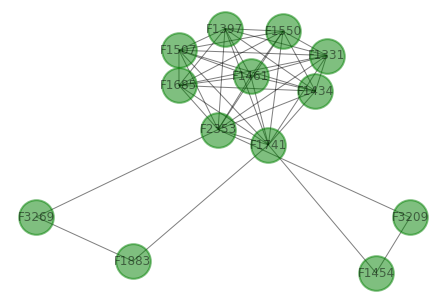

In [21]:
nx.draw(subnetworks[118], node_size=1200, node_color='g', linewidths=2, with_labels=1, alpha=0.5)

In [25]:
s = "source\ttarget\ttype\n"
for e in edges:
    s += '\t'.join(e) + '\n'
with open('G118_network.txt', 'w') as O:
    O.write(s)

In [31]:
# initiate Weavor class
WV = Weavor(peak_dict, isotope_search_patterns, adduct_search_patterns, 
                mz_tolerance_ppm=5, mode='pos')
# print(WV.mzgrid)

In [30]:
WV.mzgrid

,M+H+,Na/H,HCl,K/H,ACN
M0,1.007276,22.989276,36.983976,38.963158,42.033825
13C/12C,2.010631,23.992631,37.987331,39.966513,43.037180
13C/12C*2,3.013986,24.995986,38.990686,40.969868,44.040535
13C/12C*3,4.017341,25.999341,39.994041,41.973223,45.043890
13C/12C*4,5.020696,27.002696,40.997396,42.976578,46.047245
13C/12C*5,6.024051,28.006051,42.000751,43.979933,47.050600
13C/12C*6,7.027406,29.009406,43.004106,44.983288,48.053955
13C/12C*7,8.030761,30.012761,44.007461,45.986643,49.057310
13C/12C*8,9.034116,31.016116,45.010816,46.989998,50.060665
13C/12C*9,10.037471,32.019471,46.014171,47.993353,51.064020


In [27]:
KP = khipu_diagnosis(subnetworks[118])
KP.build_khipu(WV)

In [28]:
KP.show_trimming()

nodes_to_use:  ['F1507', 'F1685', 'F1741', 'F1461', 'F1434', 'F1454', 'F1331', 'F2353', 'F3209', 'F1550', 'F1397', 'F3269', 'F1883']
redundant_nodes:  []


In [29]:
KP.build_khipu_tree()

Aligned khipu tree: 
187.1686
├── ACN
├── HCl
├── K/H
│   ├── 226.1318@21.5
│   └── 235.1621@21.5
├── M+H+
│   ├── 188.1759@20.6
│   ├── 189.1792@20.6
│   ├── 190.1826@20.6
│   ├── 191.1859@20.6
│   ├── 192.1893@20.8
│   ├── 193.1927@20.8
│   ├── 194.196@20.8
│   ├── 196.2028@20.8
│   └── 197.2061@20.6
└── Na/H
    ├── 210.1578@20.6
    └── 219.1881@21.3



# Summary

Networks are ported to txt files and visualized in CytoScape.